# summary of 28.7.19 experiment


In [18]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np 
from imports2 import *
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

DATA_DIR= '/mnt/wrkdir/gene_discovery2/notebooks/2019_06_ALGO_SPRINT/2019_07_experiments/'

EXPERIMENTS_PATH =  '2019_07_experiments/'      
if not os.path.isdir(EXPERIMENTS_PATH):
    os.mkdir(EXPERIMENTS_PATH)
    
SHALLOW = [1000]
MEDIUM_NET = SHALLOW * 3
DEEP_NET = SHALLOW * 10
WIDE_NET = [N * 3 for N in SHALLOW * 5]

architectures = [SHALLOW, MEDIUM_NET, DEEP_NET, WIDE_NET]
optimizers = ['adam']
loss_funcs = ['mse', 'huber_loss','logcosh']
batch_sizes = [1024, 10000]


def name_experiment_file_prefix(architecture, optim, loss, batch_size):
    optim, loss, batch_size = str(optim), str(loss), str(batch_size)
    if optim.startswith('<'): optim = optim.split(' ')[1]
    if loss.startswith('<'): loss = loss.split(' ')[1]
    architecture = '-'.join([str(i) for i in architecture])
    return f'{EXPERIMENTS_PATH}{str(optim)}_{str(loss)}_bs_{str(batch_size)}_{architecture}'

def summary_table(architecture, optim=optim, loss=loss, batch_size=batch_size):
    #accuracy = pd.read_parquet(DATA_DIR+optimizer+"_"+loss+"_bs_"+batch_size+"_" +architechture+'_ACCURACY.parquet')
    df = pd.DataFrame()
    df['architecture'] = [architecture]
    df['loss'] = [loss]
    df['optimizer'] = [optimizer]
    df['batch_size'] = [batch_size]
    df = pd.concat([df, accuracy.T.reset_index(drop=True)],axis=1)
    return df

def plot_loss(file,optimizer=opt,loss=loss,batch_size=batch_size,architecture=architecture):
    df = pd.read_csv(file)
    plt.plot(df['epoch'],df['loss'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.xlim(0, 200)
    plt.ylim(0,2)
    if architecture=='1000-1000-1000-1000-1000-1000-1000-1000-1000-1000':
        architecture='1000*10'
    plt.title("optimizer="+str(optimizer)+", loss="+str(loss)+", batch="+str(batch_size)+", architecture="+str(architecture))
    plt.show()


NameError: name 'optim' is not defined

In [21]:
all_accuracy = pd.DataFrame()
general_columns = ['architecture', 'loss', 'optimizer', 'batch_size','num_epochs']
for architecture in architectures:
        for optim in optimizers:
            for loss in loss_funcs:
                for batch_size in batch_sizes:
                    FILE_PREFIX = name_experiment_file_prefix(architecture, optim, loss, batch_size)
                    ACCURACY_FILE = f'{FILE_PREFIX}_ACCURACY.parquet'
                    CSV_LOG = f'{FILE_PREFIX}.csv'
                    if os.path.isfile(ACCURACY_FILE):
                        csv = pd.read_csv(CSV_LOG)
                        df = pd.read_parquet(ACCURACY_FILE)
                        df = df.T
                        df['architecture'] = [architecture]
                        df['loss'] = [loss]
                        df['optimizer'] = [optim]
                        df['batch_size'] = [batch_size]
                        df['num_epochs'] = csv['epoch'][-1:].values[0]
                        all_accuracy = pd.concat([all_accuracy,df],axis=0)
                        
all_accuracy['architecture'] = all_accuracy['architecture'].apply(tuple)
#all_accuracy['optimizer'] = all_accuracy['optimizer'].apply(tuple)
all_accuracy[general_columns + ['in_top_1', 'in_top_5', 'in_top_20']].sort_values('in_top_1')      


architecture        loss  \
accuracy                                 (1000, 1000, 1000)     logcosh   
accuracy  (1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...     logcosh   
accuracy                                            (1000,)     logcosh   
accuracy                     (3000, 3000, 3000, 3000, 3000)     logcosh   
accuracy                                            (1000,)  huber_loss   
accuracy                                 (1000, 1000, 1000)  huber_loss   
accuracy  (1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...  huber_loss   
accuracy                                            (1000,)  huber_loss   
accuracy                                 (1000, 1000, 1000)         mse   
accuracy                                 (1000, 1000, 1000)         mse   
accuracy                                 (1000, 1000, 1000)     logcosh   
accuracy                                            (1000,)         mse   
accuracy                                            (1000,)         mse   
accuracy  (1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...  huber_loss   
accuracy                     (3000, 3000, 3000, 3000, 3000)         mse   
accuracy  (1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...         mse   
accuracy                                 (1000, 1000, 1000)  huber_loss   
accuracy  (1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...         mse   
accuracy  (1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...     logcosh   
accuracy                                            (1000,)     logcosh   
accuracy                     (3000, 3000, 3000, 3000, 3000)     logcosh   
accuracy                     (3000, 3000, 3000, 3000, 3000)  huber_loss   
accuracy                     (3000, 3000, 3000, 3000, 3000)         mse   

         optimizer  batch_size  num_epochs   in_top_1   in_top_5  in_top_20  
accuracy      adam       10000          59  21.929825  33.040936  39.473684  
accuracy      adam       10000          60  22.807018  33.918129  39.473684  
accuracy      adam       10000          62  22.807018  33.918129  39.473684  
accuracy      adam       10000          47  23.391813  33.918129  40.350877  
accuracy      adam       10000          65  23.391813  35.087719  39.181287  
accuracy      adam       10000          71  24.269006  36.842105  41.228070  
accuracy      adam       10000          65  25.438596  35.380117  40.643275  
accuracy      adam        1024          17  25.730994  35.964912  39.766082  
accuracy      adam       10000         136  25.730994  36.257310  42.105263  
accuracy      adam        1024          42  26.608187  36.549708  41.520468  
accuracy      adam        1024          21  26.608187  36.257310  42.690058  
accuracy      adam        1024          34  26.900585  39.181287  42.982456  
accuracy      adam       10000         121  26.900585  36.549708  42.397661  
accuracy      adam        1024          34  26.900585  37.134503  42.105263  
accuracy      adam       10000         119  27.192982  37.426901  41.520468  
accuracy      adam       10000         127  27.192982  36.842105  41.812865  
accuracy      adam        1024          25  27.192982  36.842105  41.228070  
accuracy      adam        1024          33  27.192982  36.842105  41.812865  
accuracy      adam        1024          34  27.777778  38.011696  42.690058  
accuracy      adam        1024          28  28.070175  37.426901  42.690058  
accuracy      adam        1024          28  28.362573  37.426901  42.397661  
accuracy      adam        1024          33  29.532164  38.596491  42.982456  
accuracy      adam        1024          76  33.040936  37.134503  45.321637

In [ ]:
param = 'architecture'

all_accuracy.groupby(param).mean()[['in_top_1']].style.bar()

In [ ]:
param = 'loss'
all_accuracy.groupby(param).mean()[['in_top_1']].style.bar()

In [ ]:
param = 'batch_size'
all_accuracy.groupby(param).mean()[['in_top_1']].style.bar()

In [ ]:
#!pip install seaborn

In [ ]:
# plot accuracy for each experiment
import seaborn as sns

rel_columns = all_accuracy.columns[0:-5]
ac = all_accuracy.groupby(general_columns).sum().sort_values('in_top_1', ascending=False)
ac = ac[rel_columns].T
ac.index = [int(c[7:]) for c in ac.index]
ac.plot().legend(bbox_to_anchor=(1.01, 1.0), fontsize=8)
plt.figure(figsize=(20,20))

---
<span style="color:blue">
    
# mid-project conclusion:  
- use large model with many parameters
- mse loss
- small batches (?)
</span>

------
## Plot loss - training advance

In [43]:
def iterate_all_params(architectures = architectures, optimizers = optimizers, loss_funcs = loss_funcs, batch_sizes = batch_sizes):
    for architecture in architectures:
        for optim in optimizers:
            for loss in loss_funcs:
                for batch_size in batch_sizes:
                    yield architecture, optim, loss, batch_size
    
def load_model_training_data(architecture, optim, loss, batch_size):
    ACCURACY_FILE = name_experiment_file_prefix(architecture, optim, loss, batch_size) + '.csv'
    df = pd.read_csv(ACCURACY_FILE)
    df['architecture'] = [architecture] * len(df)
    df['architecture'] = df['architecture'].apply(tuple)
    df['loss_func'] = [loss] * len(df)
    df['optimizer'] = [optim] * len(df)
    df['batch_size'] = [batch_size] * len(df)
    return df


def merge_all_model_training_csvs():
    df = pd.DataFrame()
    for architecture, optim, loss, batch_size in iterate_all_params():
        try:
            experiment_data = load_model_training_data(architecture, optim, loss, batch_size)
            df = pd.concat([df, experiment_data])
        except pd.errors.EmptyDataError as  e:
            pass
    return df

general_columns = ['architecture', 'loss_func', 'optimizer', 'batch_size', 'epoch']
df = merge_all_model_training_csvs()
gb = df.groupby(general_columns).mean()


gb = gb.reset_index()
gb['experiment'] = [str(v) for v in
                   gb[['architecture', 'loss_func', 'optimizer', 'batch_size']].values]

gb['n_iterations'] = gb['epoch'] * gb['batch_size']
gb

architecture   loss_func optimizer  batch_size  epoch  \
0                            (1000,)  huber_loss      adam        1024      0   
1                            (1000,)  huber_loss      adam        1024      1   
2                            (1000,)  huber_loss      adam        1024      2   
3                            (1000,)  huber_loss      adam        1024      3   
4                            (1000,)  huber_loss      adam        1024      4   
5                            (1000,)  huber_loss      adam        1024      5   
6                            (1000,)  huber_loss      adam        1024      6   
7                            (1000,)  huber_loss      adam        1024      7   
8                            (1000,)  huber_loss      adam        1024      8   
9                            (1000,)  huber_loss      adam        1024      9   
10                           (1000,)  huber_loss      adam        1024     10   
11                           (1000,)  huber_loss      adam        1024     11   
12                           (1000,)  huber_loss      adam        1024     12   
13                           (1000,)  huber_loss      adam        1024     13   
14                           (1000,)  huber_loss      adam        1024     14   
15                           (1000,)  huber_loss      adam        1024     15   
16                           (1000,)  huber_loss      adam        1024     16   
17                           (1000,)  huber_loss      adam        1024     17   
18                           (1000,)  huber_loss      adam       10000      0   
19                           (1000,)  huber_loss      adam       10000      1   
20                           (1000,)  huber_loss      adam       10000      2   
21                           (1000,)  huber_loss      adam       10000      3   
22                           (1000,)  huber_loss      adam       10000      4   
23                           (1000,)  huber_loss      adam       10000      5   
24                           (1000,)  huber_loss      adam       10000      6   
25                           (1000,)  huber_loss      adam       10000      7   
26                           (1000,)  huber_loss      adam       10000      8   
27                           (1000,)  huber_loss      adam       10000      9   
28                           (1000,)  huber_loss      adam       10000     10   
29                           (1000,)  huber_loss      adam       10000     11   
...                              ...         ...       ...         ...    ...   
1330  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000     90   
1331  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000     91   
1332  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000     92   
1333  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000     93   
1334  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000     94   
1335  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000     95   
1336  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000     96   
1337  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000     97   
1338  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000     98   
1339  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000     99   
1340  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000    100   
1341  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000    101   
1342  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000    102   
1343  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000    103   
1344  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000    104   
1345  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000    105   
1346  (3000, 3000, 3000, 3000, 3000)         mse      adam       10000    106   
1347  (3000, 3000, 3000, 3000, 3000)         mse      a

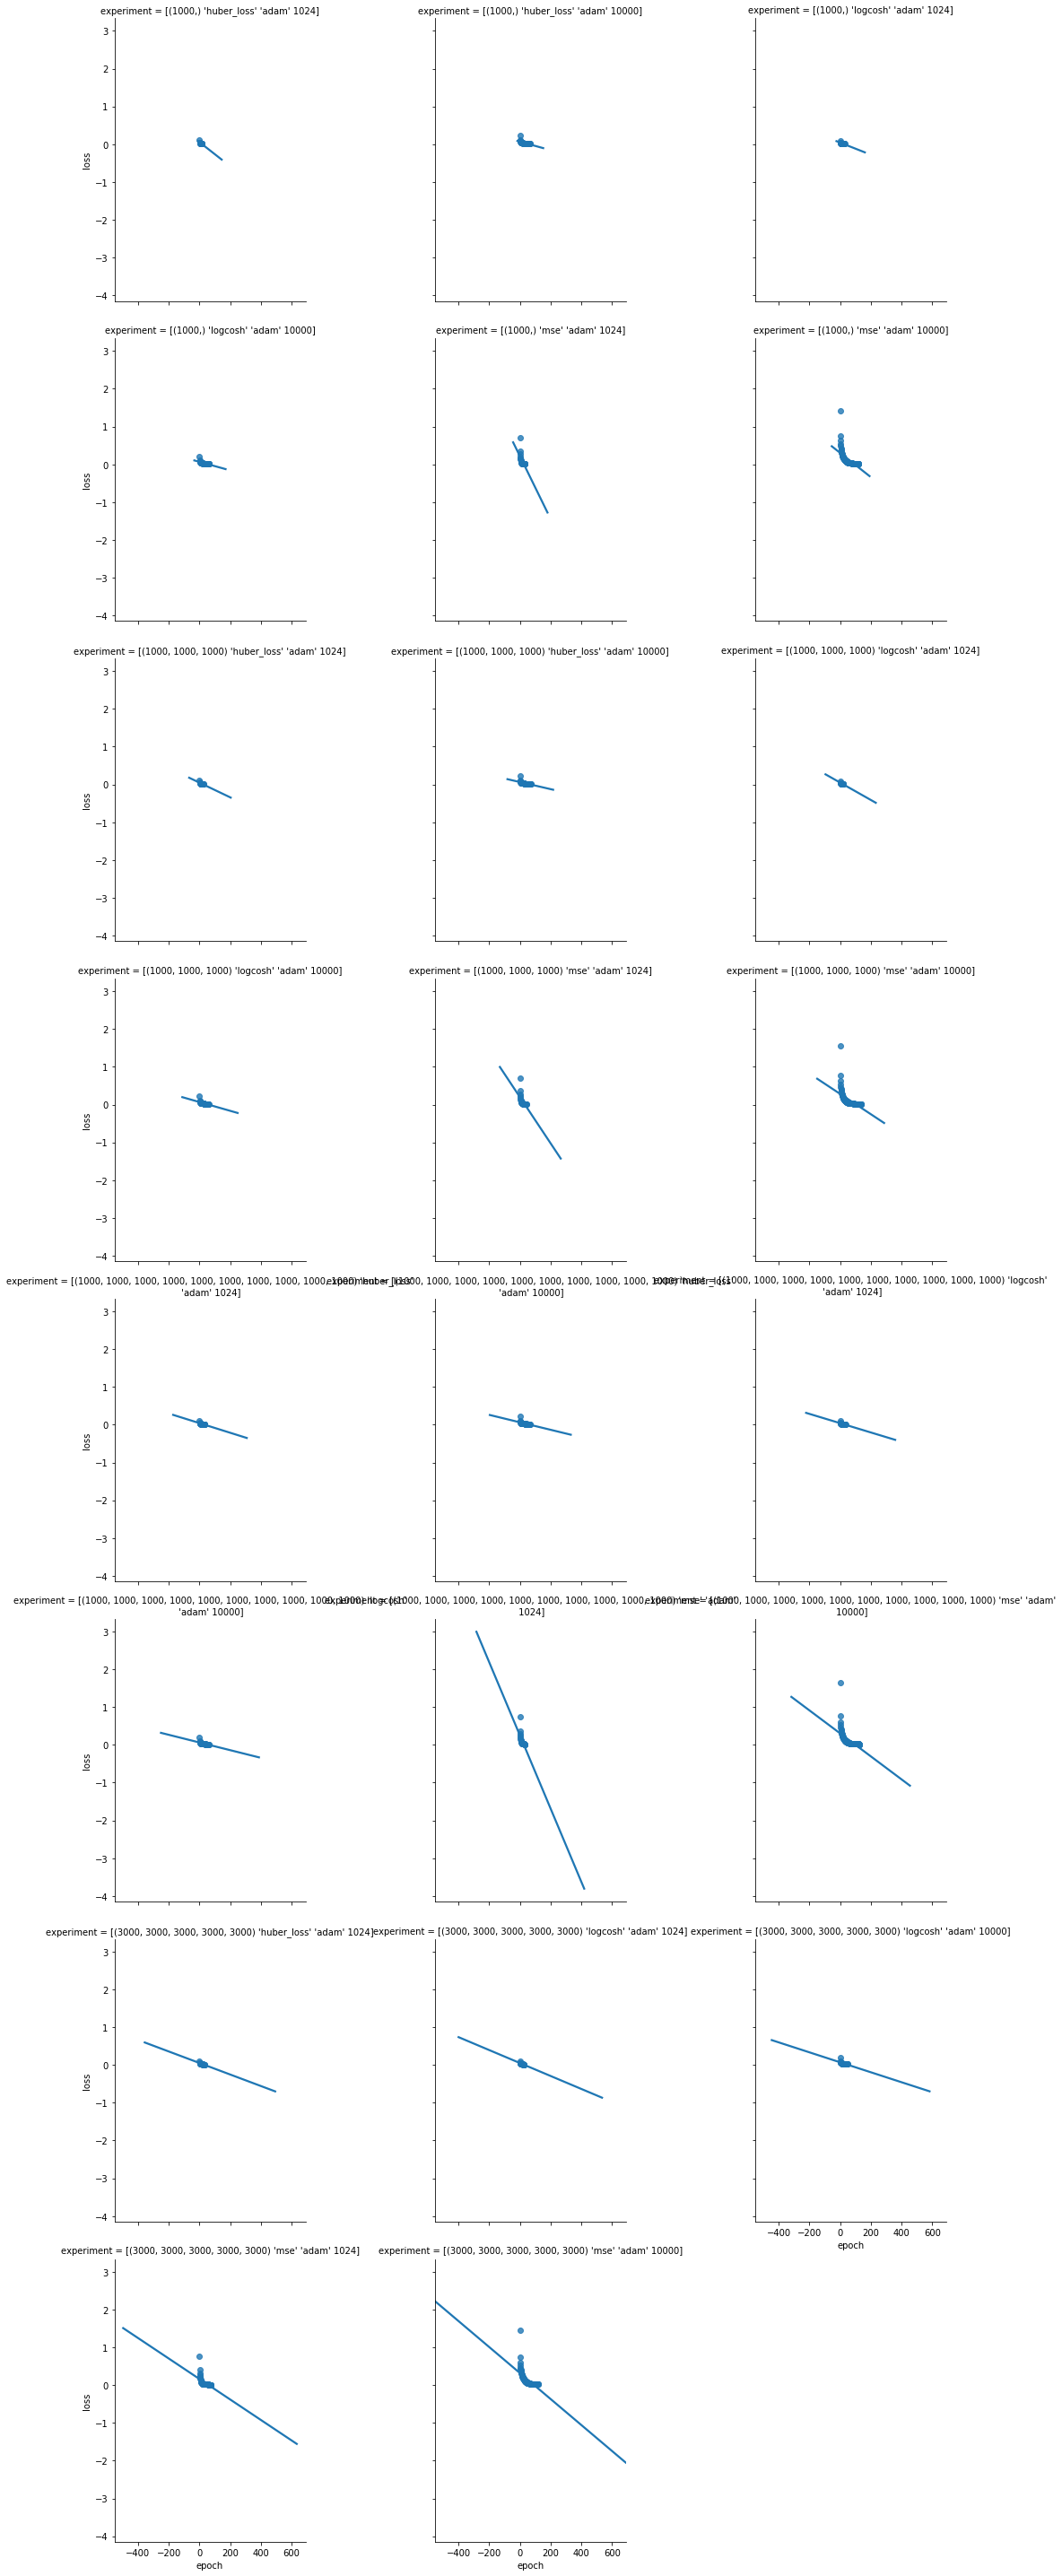

In [24]:
import seaborn as sns
sns.lmplot(data = gb, y = 'loss', x='epoch', col='experiment', col_wrap=3, ci=None)

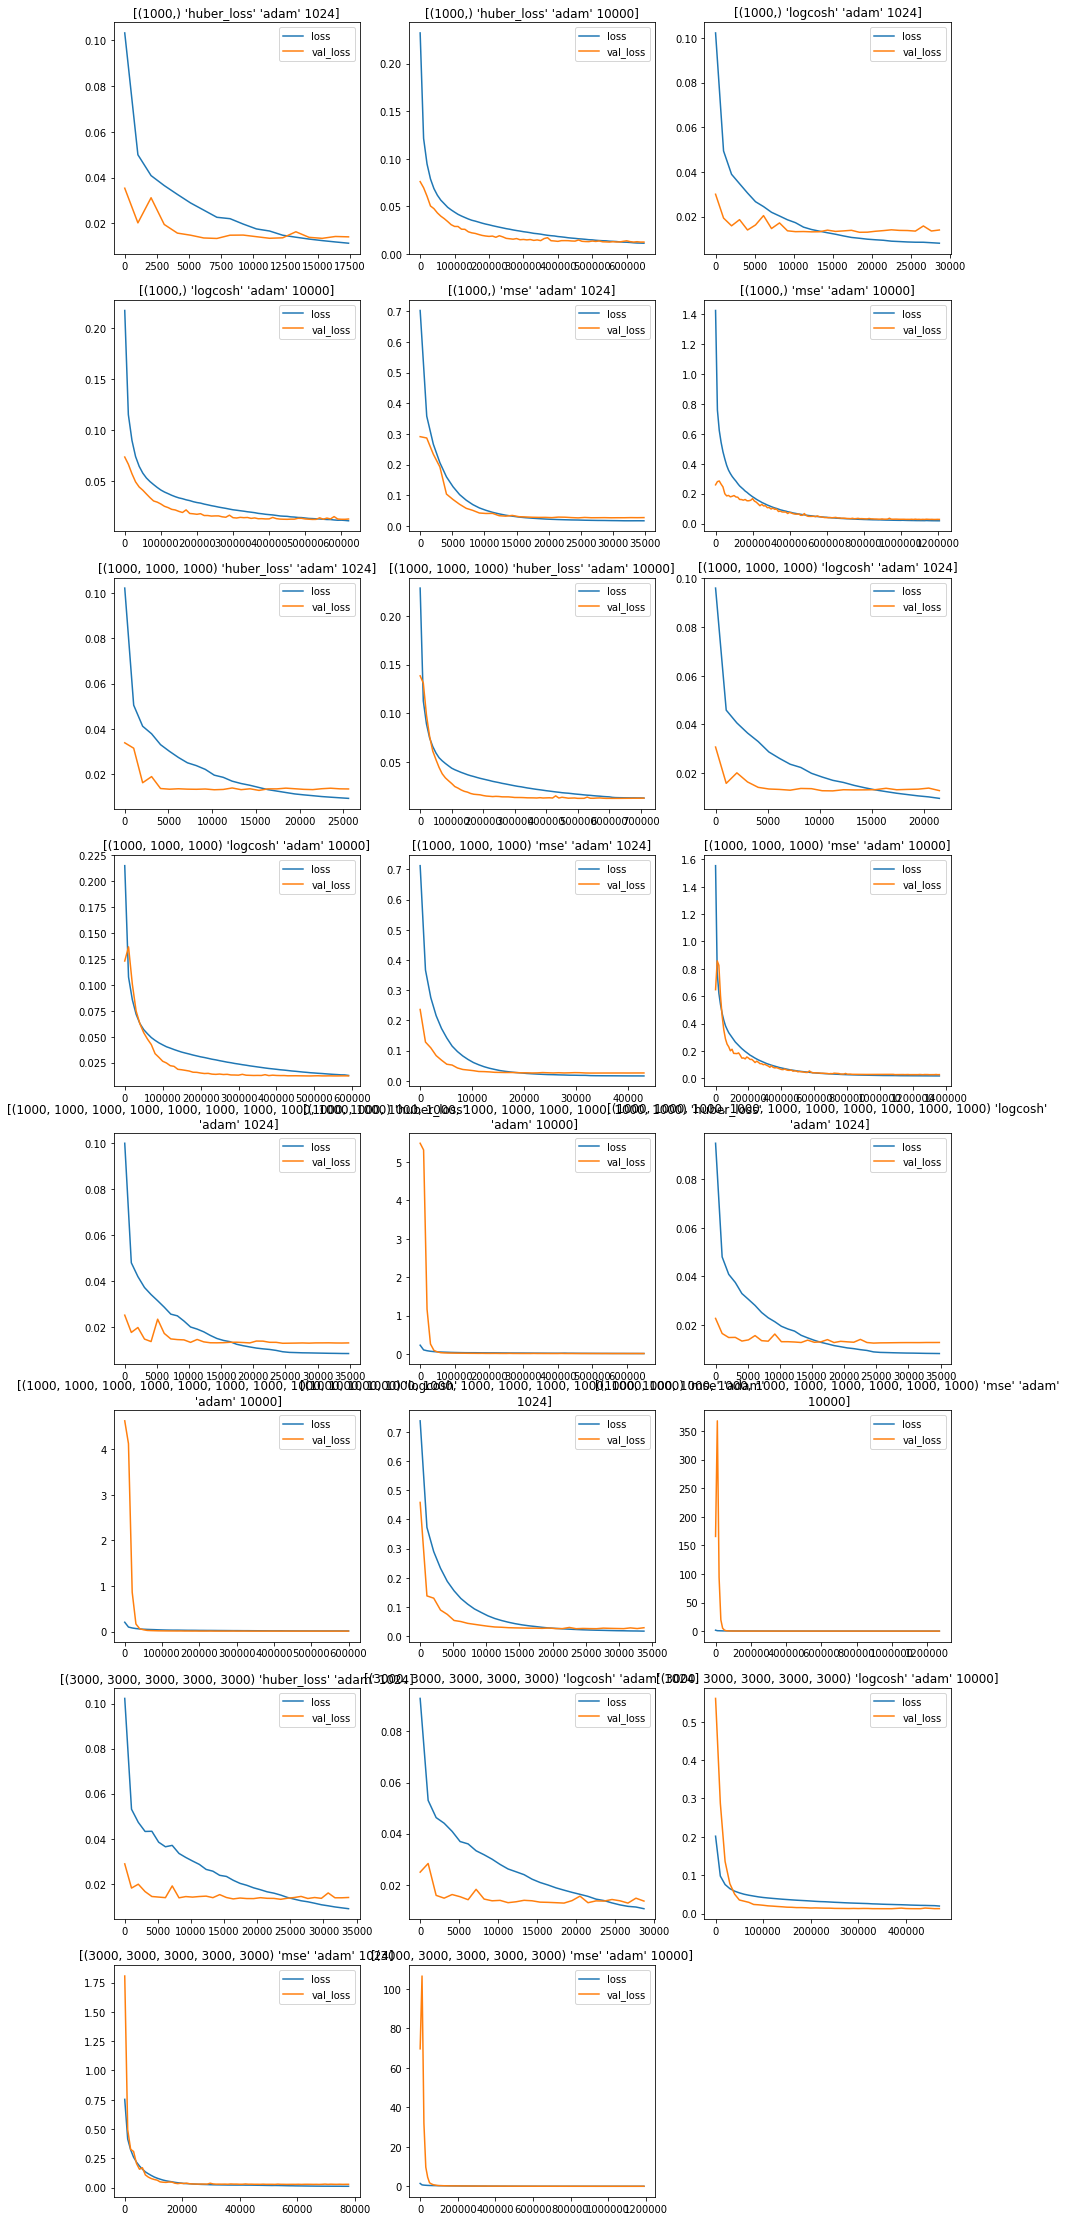

In [50]:
width = 3
height = round(gb.experiment.nunique() / width)
max_epochs = gb['epoch'].max()

fig = plt.figure(figsize=[width*5, height*5])
for idx, exp in enumerate(gb.experiment.unique()):
    data = gb[gb['experiment'] == exp][['n_iterations', 'loss', 'val_loss']]
    plt.subplot(height, width, idx + 1)
    plt.plot(*data[['n_iterations', 'loss']].T.values, label='loss')
    plt.plot(*data[['n_iterations', 'val_loss']].T.values, label='val_loss')
    plt.legend()
    plt.title(exp)


# "Sanity check" - How a random model or random data behaves

In [1]:
from imports2 import *
from neural_network_1_architecture_sprint_code_2019_07_28 import *

SHALLOW = [1000]
MEDIUM_NET = SHALLOW * 3
DEEP_NET = SHALLOW * 10
WIDE_NET = [N * 3 for N in SHALLOW * 5]


BEST_MODEL = 'adam_mse_bs_1024_3000-3000-3000-3000-3000'
EXPERIMENTS_PATH =  '2019_07_experiments/'      

if not 'X_train' in globals():
    X_train, Y_train, X_valid, Y_valid = data_loading()
    validation_gene_trait = pd.DataFrame({'Entry' : X_valid.index, 'TO': Y_valid.index})
    emb_map = pd.concat([Y_train, Y_valid], axis=0).drop_duplicates()  
    
if not 'best_model' in globals():
    best_model = Gene_to_trait_model(layers_size = WIDE_NET,  optimizer = 'adam', loss = 'mse')
    best_model.load_weights(f'{EXPERIMENTS_PATH}{BEST_MODEL}.h5')
    #rand_model = Gene_to_trait_model(layers_size = WIDE_NET,  optimizer = 'adam', loss = 'mse')

# (1) evaluate with "best_model":

emb_map = pd.concat([Y_train, Y_valid], axis=0).drop_duplicates()  

if not 'top_acc' in globals():
    top_results = evaluate_model1(best_model, X_valid, validation_gene_trait, n_neigh = emb_map.index.nunique(), emb_map=emb_map)
    top_acc = evaluate_model1_accuracy(top_results)

if not 'rand_model' in globals():
    rand_model = Gene_to_trait_model(layers_size = WIDE_NET,  optimizer = 'adam', loss = 'mse')
    rand_results = evaluate_model1(rand_model, X_valid, validation_gene_trait, n_neigh = emb_map.index.nunique(),  emb_map=emb_map)
    rand_acc = evaluate_model1_accuracy(rand_results)

acc = pd.DataFrame({'best_model' : top_acc, 'random model': rand_acc})
acc['factor'] = acc['best_model'] / acc['random model']
acc.style.bar()

Using TensorFlow backend.


## Training with shuffled data

In [2]:
def shuffle(df):     
    df = df.copy()
    for col in tqdm(df.columns):
        df[col] = np.random.permutation(df[col].values)
    return df

#shuffle the dataframes
if not 'Y_shuffled' in globals():
    X_shuffled = shuffle(X_train)
    Y_shuffled = shuffle(Y_train)
    
rand_model.fit(X_shuffled, Y_shuffled, batch_size=1024, epochs=66)

shuffled_results = evaluate_model1(rand_model, X_valid, validation_gene_trait, n_neigh = emb_map.index.nunique(),  emb_map=emb_map)
shuffled_acc = evaluate_model1_accuracy(shuffled_results)


Epoch 1/66
106094/106094 [==============================] - 49s 459us/step - loss: 0.7253
Epoch 2/66
106094/106094 [==============================] - 46s 434us/step - loss: 0.3498
Epoch 3/66
106094/106094 [==============================] - 47s 445us/step - loss: 0.2515
Epoch 4/66
106094/106094 [==============================] - 47s 446us/step - loss: 0.1865
Epoch 5/66
106094/106094 [==============================] - 47s 445us/step - loss: 0.1416
Epoch 6/66
106094/106094 [==============================] - 47s 445us/step - loss: 0.1106
Epoch 7/66
106094/106094 [==============================] - 47s 445us/step - loss: 0.0883
Epoch 8/66
106094/106094 [==============================] - 47s 446us/step - loss: 0.0727
Epoch 9/66
106094/106094 [==============================] - 47s 447us/step - loss: 0.0614
Epoch 10/66
106094/106094 [==============================] - 47s 445us/step - loss: 0.0531
Epoch 11/66
106094/106094 [==============================] - 47s 446us/step - loss: 0.0470
Epoch 1

In [4]:
acc['shuffled'] = shuffled_acc
acc.style.bar()


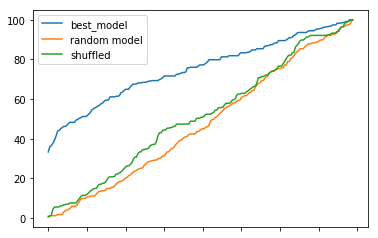

In [8]:
acc[['best_model', 'random model', 'shuffled']].plot()